In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]


import warnings
warnings.filterwarnings("ignore")

## Regressão Logística

A regressão logística é assim chamada devido a **Função Logística**  
É uma curva em formato de S que pode assumir qualquer número real e mapeálo em um intervalo entre 0 e 1 como mostra o seguinte gráfico que mostra por exemplo dois números de -5 e 5 plotados usando a função logística:
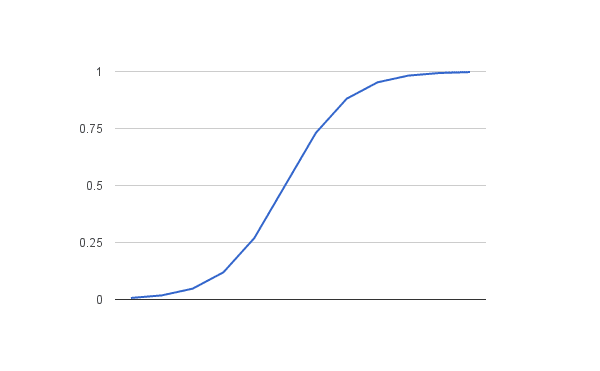

Muitos problemas requerem uma estimação probabilística como saída. Regressão logística é um mecânismo extremamente eficiente para cálculo de probabilidades. Praticamente falando, você pode usar a probabilidade retornada em duas formas:

* "Como é"
* Convertido para uma categoria binária

Vamos considerar como nós poderiamos usar "Como é". Suponhamos que criamos um modelo de regressão logística para predizer a probabilidade de que um cachorro vai latir durante o meio da noite. Nós vamos chamar essa probabilidade:

**P(latir|noite)**

Se o modelo de regressão logística predizer, durante um ano inteiro, o dono do cachorro deverá acordar assustado aproximadamente 18 vezes, calculando:

Assustado = **P(latir|noite)** * noites
              0,05 * 365 = 18 

Em muito dos casos você vai mapear o resultado em um problema de classificação binária, ou seja algo entre 0 e 1. Como isso ocorre, a **função sigmoid**, definida a seguir, produz uma saída com as mesmas características:
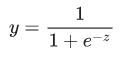


Abaixo demonstremos exemplos de aplicações de Regressão Logística:

Acurácia =  0.82 
Precisão =  0.8461538461538461 
Recall =  0.6111111111111112 
F1_SCORE =  0.7096774193548387


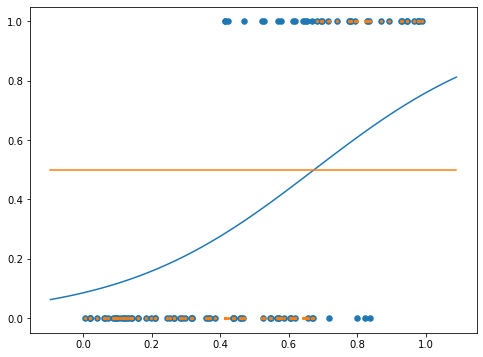

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Gera valores aleatórios pra nosso conjuntos de treinamento
np.random.seed(0)
X = np.random.rand(100).reshape(-1, 1)
y = [xi + np.random.randn() * 0.2 > 0.7 for xi in X]

#Define a Regressão Logística do sklearn
clf = LogisticRegression()

#Treina e realiza a predição
clf.fit(X, y)
y_pred = clf.predict(X)

plt.scatter(X, y, s=30)
plt.scatter(X, y_pred, s=5)

#Imprime as Métricas 
print('Acurácia = ', accuracy_score(y, y_pred),
      '\nPrecisão = ', precision_score(y, y_pred),
      '\nRecall = ', recall_score(y, y_pred),
      '\nF1_SCORE = ', f1_score(y, y_pred))

xg = np.linspace(X.min() - 0.1, X.max() + 0.1, 100).reshape(-1, 1)
plt.plot(xg, clf.predict_proba(xg)[:,1])
plt.plot(xg, 0.5 * np.ones(100))

/home/alinexavier/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


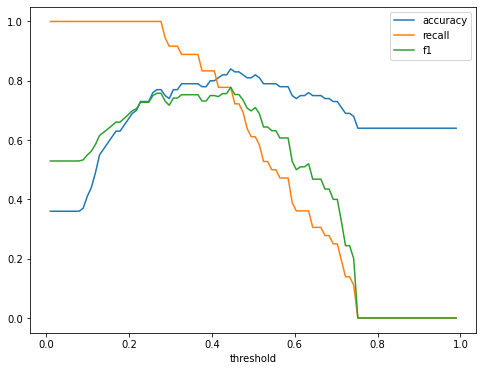

In [3]:
clf = LogisticRegression()
clf.fit(X, y)

threshold_v = np.linspace(0.01, 0.99, 100)
acc_v = []
prec_v = []
recall_v = []
f1_v = []

for threshold in threshold_v:
    y_pred = clf.predict_proba(X)[:,1] > threshold

    acc_v.append(accuracy_score(y, y_pred))
    recall_v.append(recall_score(y, y_pred))
    f1_v.append(f1_score(y, y_pred))
    
plt.plot(threshold_v, acc_v, label='accuracy')
plt.plot(threshold_v, recall_v, label='recall')
plt.plot(threshold_v, f1_v, label='f1')
plt.xlabel('threshold')
plt.legend()

### Curvas ROC e AUC

**ROC**<br>
A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

Utilizamos a curva ROC para determinar os verdadeiros positivos e os falsos positivos

O ROC possui dois parâmetros:
Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)
Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)
Uma curva ROC traça “True Positive Rate vs. False Positive Rate” em diferentes limiares de classificação (veja figura abaixo).
Assim, na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

Abaixo um plot de da curva ROC do nosso problema

Text(0.5, 1.0, 'Curva ROC')

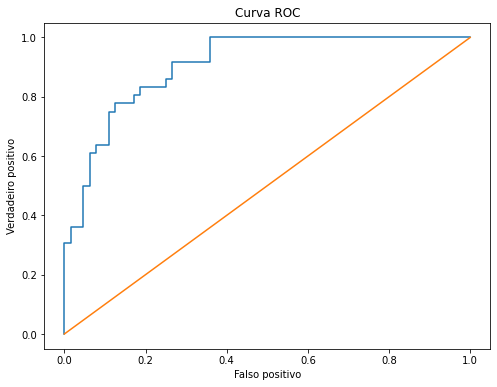

In [4]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('Falso positivo')
plt.ylabel('Verdadeiro positivo')
plt.title('Curva ROC')

**AUC**<br>
O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
Quanto maior o AUC, melhor.

Agora calculamos o AUC do nosso modelo:

In [5]:
print("AUC: ",auc(fpr, tpr))

AUC:  0.90625


Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1.

### Dataset Empréstimo

Peguemos um dataset com dados de empréstimo, e um classificador binário, caso a pessoa tenha pago será 1, caso contrário, 0. Com isso usaremos a regressão logística para prever se o usuário irá pagar ou não sua dívida de acordo com os dados que possuímos.

In [6]:
#Prévia dos dados
data = pd.read_csv('emprestimo.csv')
data

,salario,valor,periodo,pagou
0,2620.0,93000.0,60,0.0
1,7470.0,81000.0,60,0.0
2,1300.0,50000.0,48,0.0
3,4280.0,32000.0,12,1.0
4,4840.0,109000.0,12,0.0
...,...,...,...,...
195,7330.0,108000.0,48,0.0
196,4110.0,51000.0,24,0.0
197,6140.0,65000.0,12,0.0
198,7950.0,90000.0,12,1.0


In [7]:
#Separamos os X e o y do nosso problema
X = data[['salario', 'valor']].values
y = data['pagou'].values

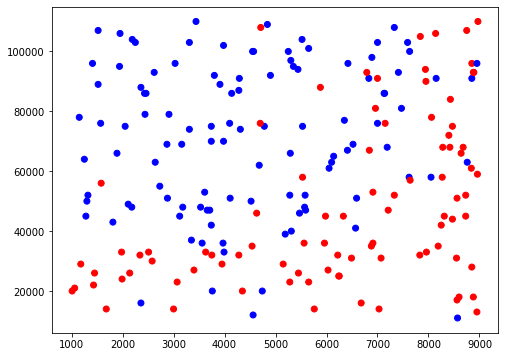

In [8]:
#Um plot de como estão distribuídos os dados do nosso dataset de acordo com o y
from matplotlib import colors
cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(data.salario, data.valor, c=y, cmap=cmap)

Abaixo iremos separar o conjunto de dados em treino e teste e e realizaremos o treino/predição para compararmos os resultados após a execução

Acurácia:  0.7375


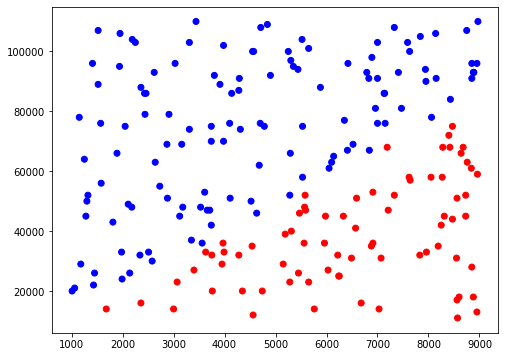

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Separamos 40% do dataset sem randomizar para teste
Xtr, Xte, ytr, yte = train_test_split(X, y, random_state=0, test_size=0.4)

clf = LogisticRegression()
clf.fit(Xtr, ytr)
y_pred = clf.predict(Xte)

#Acurácia do nosso modelo
print("Acurácia: ", accuracy_score(y_pred, yte))

cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(data.salario, data.valor, c=clf.predict(X), cmap=cmap)

### GridSearch + Regressão logística 
 
O GridSearch é usado para encontrar os hiperparâmetros ideais de um modelo que resulta em previsões mais "precisas". Até agora utilizamos nos modelos apenas a forma padrão.

No exemplo abaixo, colocar novos parâmetros não ajudou na precisão do modelo, mas conseguimos ver como o GridSearch funciona, ao expecificar um conjunto de parâmetros ele faz uma combinação entre os elementos. No exemplo são 16 combinações.

Existem muitos parâmetros possiveis para o modelo, a lista completa pode ser encontrada na documentação do sklearn, no exemplo abaixo 'penalty' é usada para especificar a norma usada na penalização.


In [22]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, sol

[CV] END ...............C=10.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...............C=10.0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=10.0, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ...........C=10.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=10.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=10.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=10.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...........C=10.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=10.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ............C=10.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ............C=10.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ............C=10.0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ............C=10.0,

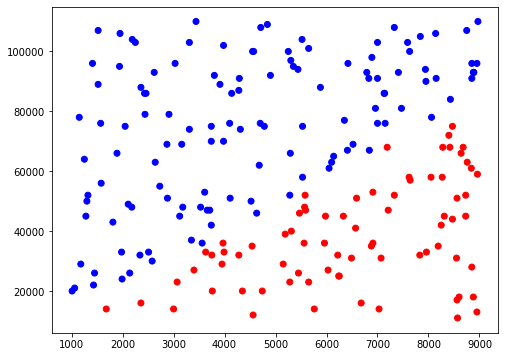

In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1.0, 10.0, 100.0],
    'solver': ['lbfgs', 'saga','newton-cg']
}

gs = GridSearchCV(LogisticRegression(), params, cv = 5, verbose=2)
gs.fit(Xtr, ytr)

y_pred = gs.predict(Xte)

print("\n Acurácia: ", accuracy_score(y_pred, yte))

cmap = colors.ListedColormap(['blue', 'red'])
plt.scatter(data.salario, data.valor, c=clf.predict(X), cmap=cmap)

Bibliografia: <br>
* https://developers.google.com/machine-learning/crash-course/logistic-regression
* https://medium.com/bio-data-blog/entenda-o-que-é-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772
* **CiDAMO**
